# Part 0

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set3")

# Part 1 - What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

The first thing to do is to import our data, standardise the columns to snake_case and inspect the new dataframe "amazon"

In [74]:
amazon = pd.read_csv("amz_uk_price_prediction_dataset.csv",skipinitialspace = True)
amazon.columns = [columns.lower().replace(" ", "_") for columns in amazon.columns]   ### anti-whitespace magic

amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isbestseller       bool   
 7   boughtinlastmonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


After this is done, we can split the original dataframe into 2 more dataframes for categoric and numeric data, named "cat" and "num" respectively.

In [75]:

cat = amazon.select_dtypes(exclude="number")
print(f"\n The categorical columns of the amazon dataframe are :{list(cat.columns)}\n ")
print(cat.info())

num = amazon.select_dtypes(include="number") 
print(f"\n The numerical columns of amazon dataframe are :{list(num.columns)}\n ")
print(num.info())


 The categorical columns of the amazon dataframe are :['asin', 'title', 'isbestseller', 'category']
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   asin          object
 1   title         object
 2   isbestseller  bool  
 3   category      object
dtypes: bool(1), object(3)
memory usage: 58.3+ MB
None

 The numerical columns of amazon dataframe are :['uid', 'stars', 'reviews', 'price', 'boughtinlastmonth']
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   stars              float64
 2   reviews            int64  
 3   price              float64
 4   boughtinlastmonth  int64  
dtypes: float64(2), int64(3)
memory usage: 93.2 MB
None


In our numeric dataframe we are going to:

1) Check for duplicated rows and sum the number of them.
2) Check the number of null values in each column and identify which columns do have them.
3) Sum the total number of null values in the dataframe.

In [77]:
num_non_null_columns =num.notnull().sum()
num_non_null_total = num.notnull().sum().sum()
num_non_null_percentage_column = num.notnull().sum() / len(num)
num_non_null_percentage_total = (num.notnull().sum().sum()) / (num.size)
                                                                            # Count of non-missing values per column:

num_dup = num.duplicated()
num_dup_total = num.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
num_na_columns = num.isna().sum()             
num_na_total = num.isna().sum().sum()

print(f"""
number of non-null values in the frame of numeric data: {num_non_null_total},
number of non-null values by column: \n\n{num_non_null_columns}\n

precentage of non-null values in the frame of numeric data: {num_non_null_percentage_total * 100},
precentage of non-null values by column:  \n\n {num_non_null_percentage_column * 100}\n
      
number of duplicates in the frame of numeric data: {num_dup_total},

number of null values in the frame of numeric data:{num_na_total},
number of null values by column:\n\n{num_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(num[num_dup].index )}") # num_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(num_na_columns[num_na_columns > 0].index)}")



number of non-null values in the frame of numeric data: 12218255,
number of non-null values by column: 

uid                  2443651
stars                2443651
reviews              2443651
price                2443651
boughtinlastmonth    2443651
dtype: int64


precentage of non-null values in the frame of numeric data: 100.0,
precentage of non-null values by column:  

 uid                  100.0
stars                100.0
reviews              100.0
price                100.0
boughtinlastmonth    100.0
dtype: float64


number of duplicates in the frame of numeric data: 0,

number of null values in the frame of numeric data:0,
number of null values by column:

uid                  0
stars                0
reviews              0
price                0
boughtinlastmonth    0
dtype: int64

The following rows are duplicates: 
The following columns have null values: 


In our categoric dataframe we are going to do the same but we are also going to strip whitespace from string entries and check for entries that are pure white space.

In [78]:
##.strip() on cat

stripped = lambda _: _.strip() if isinstance(_, str) else _
cat = cat.map(stripped)

##

cat_non_null_columns = cat.notnull().sum()
cat_non_null_total = cat.notnull().sum().sum()
cat_non_null_percentage_column = cat.notnull().sum() / len(cat)
cat_non_null_percentage_total = (cat.notnull().sum().sum()) / (cat.size)
                                                                            # Count of non-missing values per column:

cat_dup = cat.duplicated()
cat_dup_total = cat.duplicated().sum()                                      # One fewer sum as duplicated returns series not a frame
cat_na_columns = cat.isna().sum()             
cat_na_total = cat.isna().sum().sum()

#cat_spaced_values_total_old = cat.eq(" ").sum().sum()                      # Old basic whitespace detector

cat_spaced_values_columns = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum() 
cat_spaced_values_total = cat.astype(str).apply(lambda _ : _.str.match(r'^\s*$')).sum().sum() 

# Treats every column as data type string, and for every column applies the check that it is not continuos whitespace using the regex
# expression r'^\s*$' and the str.match() method. ^ indicates the start, \s*checks for coninuos whitespace, and $indicates the end of the expression. 

print(f"""
number of non-null values in the frame of categoric data: {cat_non_null_total},
number of non-null values by column: \n\n{cat_non_null_columns}\n

percentage of non-null values in the frame of categoric data: {cat_non_null_percentage_total * 100},
percentage of non-null values by column: \n\n{cat_non_null_percentage_column * 100}\n 

number of duplicates in the frame of categoric data: {cat_dup_total},

number of white space values in the frame of categoric data: {cat_spaced_values_total},
number of white space values by column: \n\n{cat_spaced_values_columns}

number of null values in the frame of categoric data:{cat_na_total},
number of null values by column:\n\n{cat_na_columns}\n""")

print(f"The following rows are duplicates: {','.join(cat[cat_dup].index )}") # cat_dup is a boolean series which acts as a filter condition
print(f"The following columns have null values: {','.join(cat_na_columns[cat_na_columns > 0].index)}")



number of non-null values in the frame of categoric data: 9774604,
number of non-null values by column: 

asin            2443651
title           2443651
isbestseller    2443651
category        2443651
dtype: int64


percentage of non-null values in the frame of categoric data: 100.0,
percentage of non-null values by column: 

asin            100.0
title           100.0
isbestseller    100.0
category        100.0
dtype: float64
 

number of duplicates in the frame of categoric data: 0,

number of white space values in the frame of categoric data: 0,
number of white space values by column: 

asin            0
title           0
isbestseller    0
category        0
dtype: int64

number of null values in the frame of categoric data:0,
number of null values by column:

asin            0
title           0
isbestseller    0
category        0
dtype: int64

The following rows are duplicates: 
The following columns have null values: 


After all of that, our data checking has not revealed any errors in terms of null values etc...

So onwards to establishing a frequency table for the category column of our categoric data datafram. (Unfortunate naming but sufficiently clear.)

In [79]:
freq_tab_category = cat.category.value_counts()
display(freq_tab_category[:5])

top_5_categories_index = freq_tab_category.index[:5]

print("The top 5 product categories are:\n ")
for _ in top_5_categories_index:
    print(_)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

The top 5 product categories are:
 
Sports & Outdoors
Beauty
Handmade Clothing, Shoes & Accessories
Bath & Body
Birthday Gifts


We can clearly see just from the table that the "Sports & Outdoors" category is overwhelmingly dominant so we will display graphics including and excluding that category. Also we will be extending the range to the top 10 categories as we are removing "Sports & Outdoors" from some.

It may also be worth considering that a lot of data may be incorrectly labelled as "Sport & Outdoors" or that it may just be too broad of a category.

<function matplotlib.pyplot.show(close=None, block=None)>

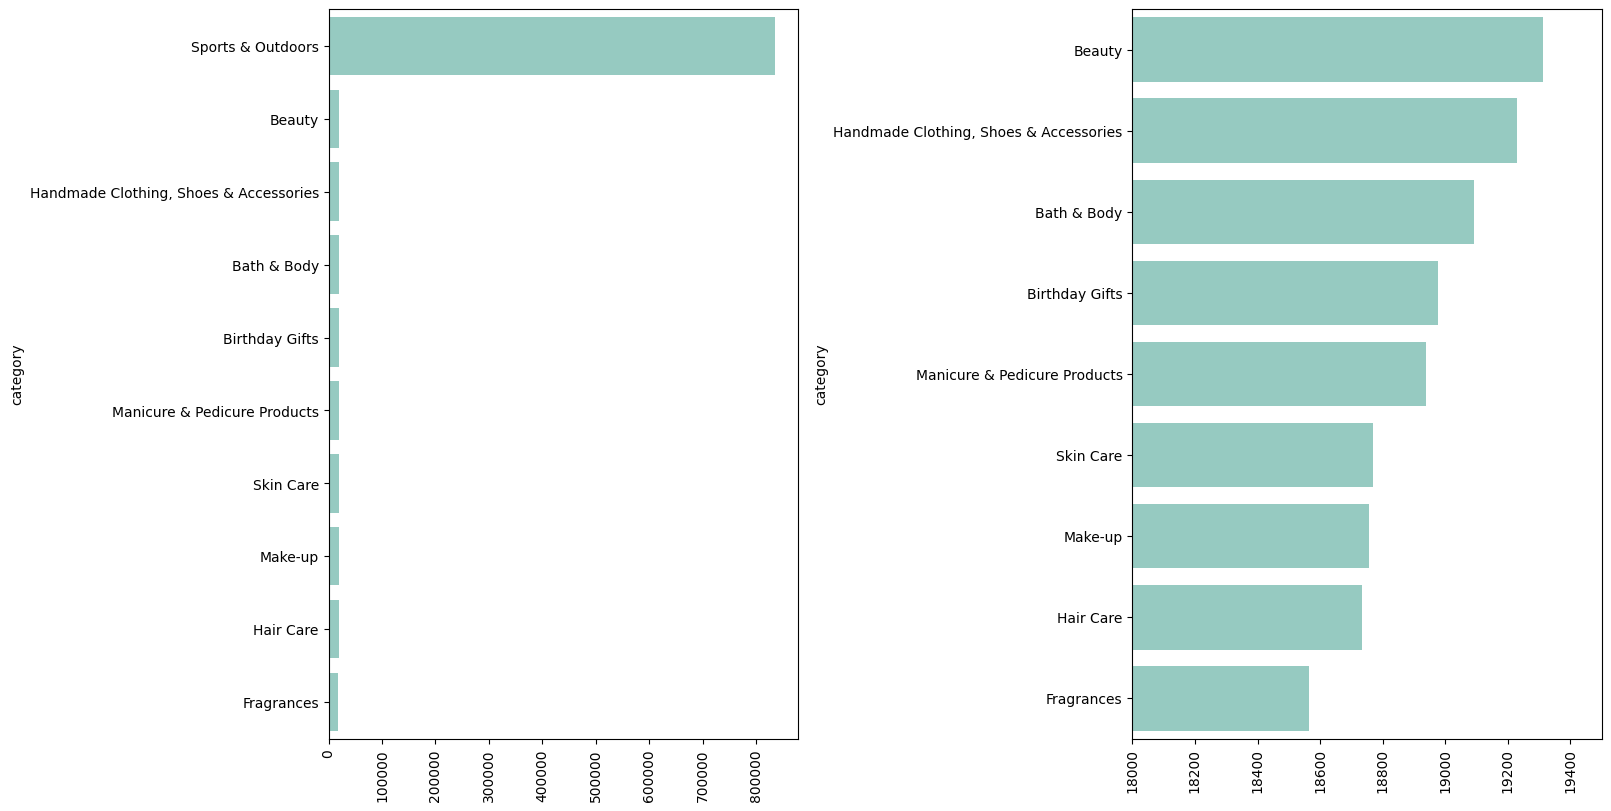

In [80]:
top_10_categories = freq_tab_category[:10]
top_10_categories_no_sports = freq_tab_category[1:10]

fig, axs = plt.subplots(1,2, figsize = (16,8), constrained_layout = True)

sns.barplot(x=top_10_categories.values, y=top_10_categories.index, ax = axs[0])
axs[0].tick_params(axis = "x" ,labelrotation = 90)

sns.barplot(x=top_10_categories_no_sports.values, y=top_10_categories_no_sports.index, ax = axs[1])
axs[1].set_xlim(18000,19500)
axs[1].tick_params(axis = "x" ,labelrotation = 90)
plt.xticks(rotation=90)

plt.show

Please note the change of scale on the x axis

Interestingly, the majority of the top 10 categories could be grouped together into "Beauty". suporting the idea that either "Beauty" should be a much larger category or that "Sports & Outdoors" should be broken down into smaller categories.

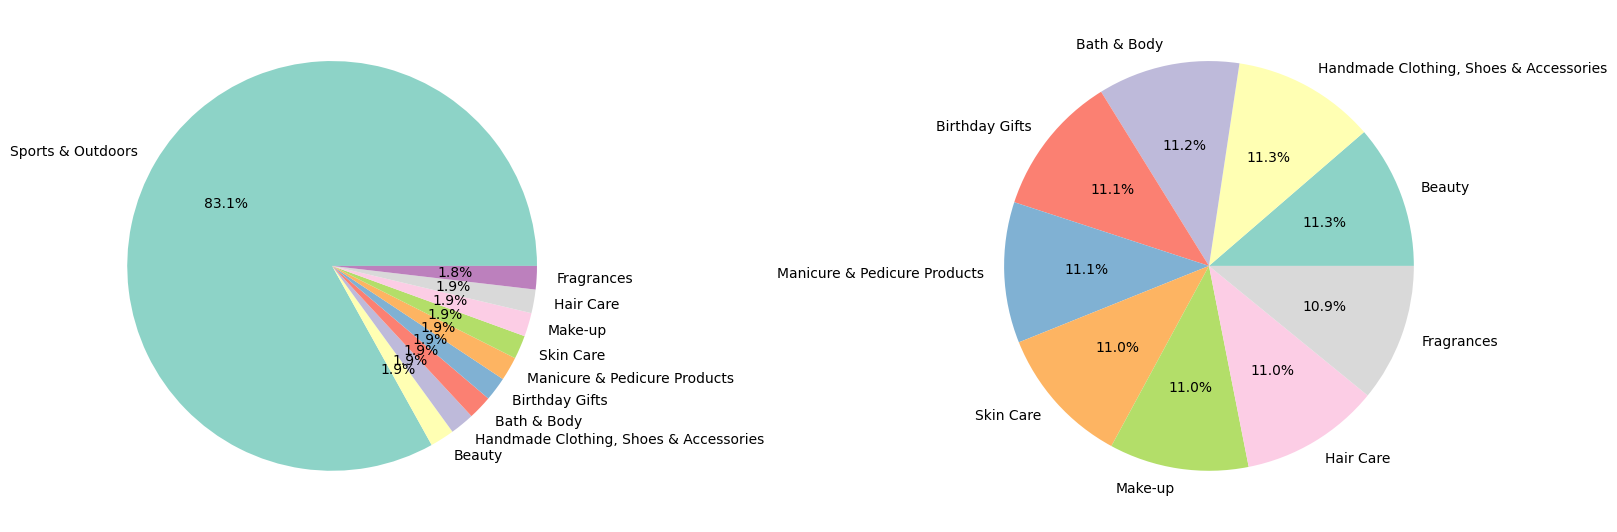

In [81]:
fig, axs = plt.subplots(1,2, figsize = (16,8), constrained_layout = True)

axs[0].pie(top_10_categories, labels = top_10_categories.index, autopct='%1.1f%%')

axs[1].pie(top_10_categories_no_sports, labels = top_10_categories_no_sports.index, autopct='%1.1f%%')

plt.show()

It must be stated that this is not a representation of 100% of the data, just the top 10 catergories and then the same minus "Sports & Outdoors".

# Part 2 -- Product Pricing

In [82]:
# making a function

def univariate_numerical_analysis(numerical_frame: pd.DataFrame ,column:str, new_index:str):
    
    numerical_data = numerical_frame.loc[:,column]

    mean_val = round(numerical_data.mean(),2)
    median_val = round(numerical_data.median(),2)
    std_val = round(numerical_data.std(),2)
    range_val = round(numerical_data.max() - numerical_data.min(),2)  
    iqr_val = round(numerical_data.quantile(0.75)-numerical_data.quantile(0.25),2)
    skew_val = round(numerical_data.skew(),2)
    kurtosis_val = round(numerical_data.kurtosis(),2)
    coefficient_of_variance_val = round(((std_val / mean_val) if mean_val != 0 else 0),2) 
    mode_val = numerical_data.mode().tolist()    
    mode_val_string = ""

    for _ in mode_val:
        mode_val_string += str(format(_, ".2f")) + ","



    output_frame = pd.DataFrame(
        {"Mean": [mean_val],
         "Median": [median_val],
         "Mode": [mode_val],
         "Standard Deviation": [std_val],
         "Range": [range_val],
         "Inter-Quartile Range": [iqr_val],
         "Skewness": [skew_val],
         "Kurtosis": [kurtosis_val],
         "Coefficient of Variance": [coefficient_of_variance_val]})
    output_frame.index = [new_index]

    return(output_frame)
    


In [83]:
price_univariate_frame = univariate_numerical_analysis(num,"price","price_original")

display(price_univariate_frame)


,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
price_original,89.24,19.09,[9.99],345.61,100000.0,36.0,27.49,4241.62,3.87


The Mean product price is nearly 10 times the size of the mode price.

The ratio between the standard deiviation and the mean (the coefficient of variance) is 3.87 (rounded,2dp)
which is far greater than 1, suggesting that the product prices are extremely spread.

However the size of the IQR (36.0) compared to the range (100000.0) shows the majority of data points are near the mean
and suggests that the data is very heavily positively skewed by extreme values above the mean.

lets explore the effect of removing some of these extreme positive values from our distributions, we will do this incrementally and calculate new metrics for these new distibutions after the plots.

<Axes: xlabel='price', ylabel='Count'>

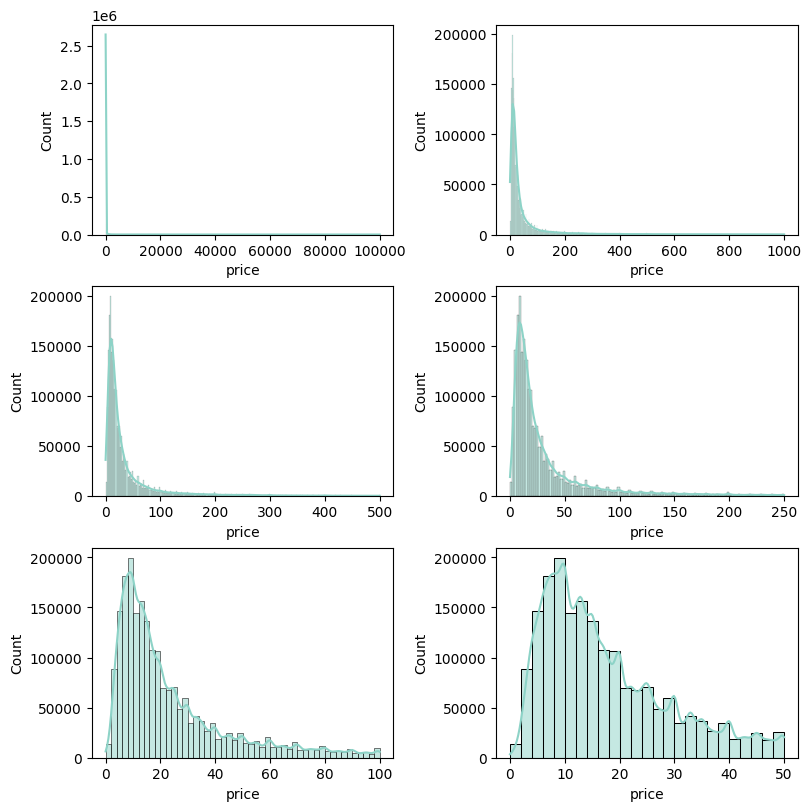

In [84]:
price = num["price"]
prices_less_1000 = price[price <= 1000]
prices_less_500 = price[price <= 500]
prices_less_250 = price[price <= 250]
prices_less_100 = price[price <= 100]
prices_less_50 = price[price <= 50]

fig, axs = plt.subplots(3,2, figsize = (8,8), constrained_layout = True)

sns.histplot(price, kde=True, bins=1000, ax = axs[0,0])
sns.histplot(prices_less_1000, kde=True, bins=500, ax = axs[0,1])
sns.histplot(prices_less_500, kde=True, bins=250, ax = axs[1,0])
sns.histplot(prices_less_250, kde=True, bins=125, ax = axs[1,1])
sns.histplot(prices_less_100, kde=True, bins=50, ax = axs[2,0])
sns.histplot(prices_less_50, kde=True, bins=25, ax = axs[2,1])

(0.0, 50.0)

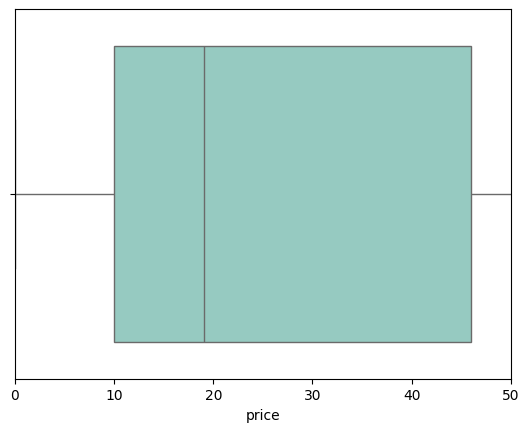

In [85]:
sns.boxplot(x=price)
plt.xlim(0,50)

In [86]:
prices_less_1000_univariate_frame = univariate_numerical_analysis(prices_less_1000.to_frame(),"price","price < 1000")
prices_less_500_univariate_frame = univariate_numerical_analysis(prices_less_500.to_frame(),"price","price < 500")
prices_less_250_univariate_frame = univariate_numerical_analysis(prices_less_250.to_frame(),"price","price < 250")
prices_less_100_univariate_frame = univariate_numerical_analysis(prices_less_100.to_frame(),"price","price < 100")
prices_less_50_univariate_frame = univariate_numerical_analysis(prices_less_50.to_frame(),"price","price < 50")

series_to_merge = [price_univariate_frame,
                   prices_less_1000_univariate_frame,
                   prices_less_500_univariate_frame,
                   prices_less_250_univariate_frame,
                   prices_less_100_univariate_frame,
                   prices_less_50_univariate_frame]

prices_combined  = pd.concat(series_to_merge)

display(prices_combined)

,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
price_original,89.24,19.09,[9.99],345.61,100000.0,36.00,27.49,4241.62,3.87
price < 1000,56.63,18.95,[9.99],117.95,1000.0,33.30,4.44,22.75,2.08
price < 500,43.31,18.08,[9.99],70.56,500.0,30.00,3.49,13.75,1.63
price < 250,33.12,17.50,[9.99],41.61,250.0,26.07,2.67,7.69,1.26
price < 100,23.42,15.99,[9.99],20.54,100.0,20.86,1.64,2.29,0.88
price < 50,17.42,14.24,[9.99],11.43,50.0,15.29,0.97,0.18,0.66


The above graphs and table prove the point that extreme outliers have dragged the mean (89.24) up far above the median (19.09) and even outside the IQR. lets re-run all of the statistcal metrics on the price series again with the limitations imposed in the graphs. And afterwards we will use a metric to filter for outliers.

Now it's time to use a simple test for filtering outliers that is robust to skewness: An IQR filter

Outliers are points outside this range: Lower Bound=Q1−1.5×IQR, Upper Bound=Q3+1.5×IQR



In [87]:
q1 = np.percentile(price, 25)
q3 = np.percentile(price, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outlier_mask = (price < lower_bound) | (price > upper_bound)
outliers = price[outlier_mask]

price_no_outliers_by_iqr = price[~outlier_mask]

univariate_numerical_analysis(price_no_outliers_by_iqr.to_frame(),"price", "price_no_outliers_by_iqr")

,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
price_no_outliers_by_iqr,23.41,15.99,[9.99],20.51,99.99,20.86,1.64,2.29,0.88


<Axes: xlabel='price', ylabel='Count'>

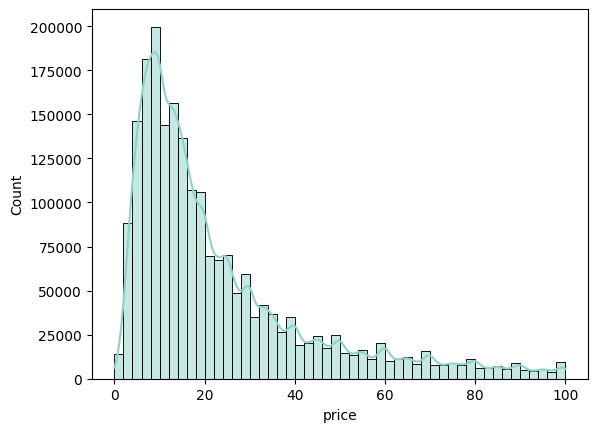

In [88]:
sns.histplot(price_no_outliers_by_iqr, kde=True, bins=50)

This seems far more representative now to take some notes

- The distbution is heavily positively skewed
- the coefficient of variance suggests a high degree of variance
- a kurtosis of 5.29 (2.29 is excess Kurtosis returned by the.kurtosis method of pandas) being more than 3 suggests extreme values and longer tails and in addition the left tail can not extend into the negative as it is bounded by zero. so a kurtosis of 5.29 for essentially only one tail on one side is extreme.


# Part 3 -- Product Ratings

lets now investigate the rating scores (stars) left by customers.

In [89]:
univariate_numerical_analysis(num,"stars","stars_original")

,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
stars_original,2.15,0.0,[0.0],2.19,5.0,4.4,0.08,-1.93,1.02


This is highly suspicious. So many 0 star reviews suggests something is driving this pattern. lets investigate the correlation of the absence of reviews and the 0 stars:

In [90]:
no_stars = (num["stars"]== 0)
no_reviews = (num["reviews"]== 0)

print(f" the correlation of no_stars and no_reivews is {no_stars.corr(no_reviews, method='spearman')}")

 the correlation of no_stars and no_reivews is 0.9999999999999998


 looks like we have found something. This would suggest that an absence of a review results in a default of zero stars. it may also be worth checking to see if any value less than one is possible.

In [91]:
less_one_star = (num["stars"] < 1) & (num["stars"] > 0)
print(less_one_star.sum())

0


There are no star ratings between 0 and 1, so lets limit our analysis of stars to values equal to or greater than one.

In [92]:
num_filtered_stars = ((num[num["stars"] >= 1 ])["stars"]).to_frame()        #Avoids num_filtered_stars being treated as a series rather than a complete dataframe

In [93]:
univariate_numerical_analysis(num_filtered_stars,"stars","stars >= 1")

,Mean,Median,Mode,Standard Deviation,Range,Inter-Quartile Range,Skewness,Kurtosis,Coefficient of Variance
stars >= 1,4.32,4.4,[4.5],0.56,4.0,0.5,-2.38,9.78,0.13


(3.0, 5.0)

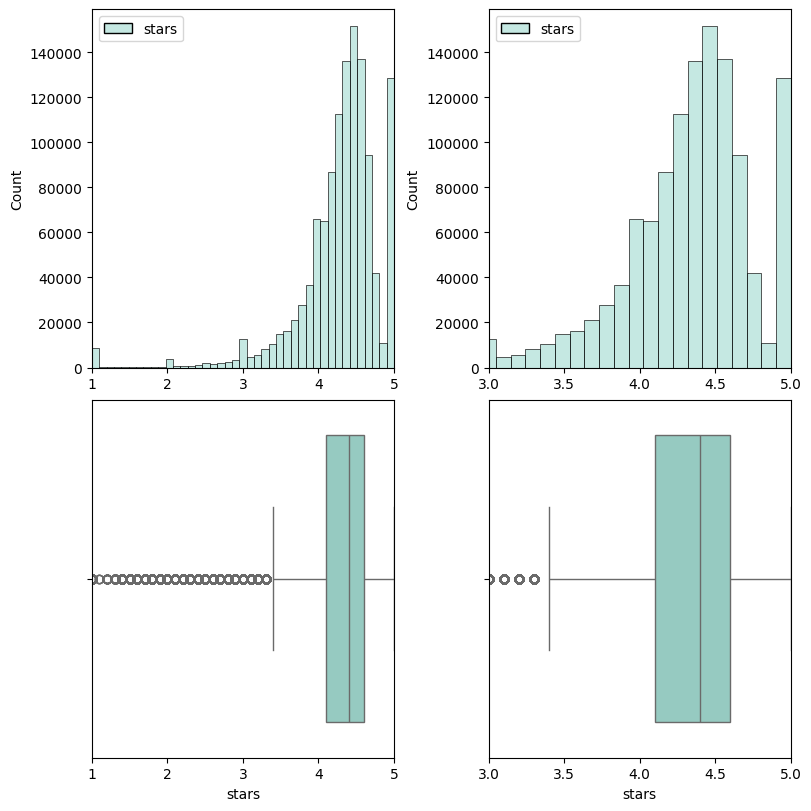

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (8,8), constrained_layout = True)

sns.histplot(num_filtered_stars, bins=41,ax = axs[0,0])
axs[0, 0].set_xlim(1, 5)

sns.histplot(num_filtered_stars, bins=41,ax = axs[0,1])
axs[0, 1].set_xlim(3, 5)

sns.boxplot(x=num_filtered_stars["stars"], ax = axs[1,0])                   #Needs to be a series not a frame for box plot
axs[1, 0].set_xlim(1, 5)

sns.boxplot(x=num_filtered_stars["stars"],ax = axs[1,1])                    #Needs to be a series not a frame for box plot
axs[1, 1].set_xlim(3, 5)

1) We have a large negative skew. 
2) Most people rate products in the 4.3 to 4.5 range which is a clear peak. but there is a spike at 5 stars which seems to be a default value people choose. similar behaviour is seen with one star reviews but to lesser degree. These behaviours escapethe pattern of the rest of the data.
3) The standard deviation and the coefficient of variation are low, suggesting tightly packed data however the raw kurtosis of 12.78 (9.78 excess kurtosis) is massive. This due to a long left leading tail of  negative reviews with a spike at the lower bound of the range (1), which is not extreme enough to cause confusion in kurtosis calculations of where the peak of the distibution actaully lies.
this confusion was seen in the non filtered distribution where the raw kurtosis was a mere 5.29 in comparison to 12.78.